<a href="https://colab.research.google.com/github/samhargadon/hargadon-neur-265/blob/main/coding_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #3

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Make a *Code Cell* that imports <code>numpy</code> as <code>np</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, and <code>scipy.stats</code> as <code>stats</code>.

3. Make a *Code Cell* that imports your <code>v_rest_sst.csv</code> and <code>v_rest_pvalb.csv</code> variables as <code>numpy</code> arrays called <code>v_rest_sst</code> and <code>v_rest_pvalb</code> respectively.

4. Make a *Code Cell* that does the following:
  
  a. Finds the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.
  
  b. Performs a t-test to test the null hypothesis that the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> come from different distributions.

  c. Plots a histogram of <code>v_rest_sst</code> in one subplot, and a histogram of <code>v_rest_pvalb</code> in another subplot if the p-value of the t-test is > 0.05. You can make two subplots using the syntax <code>fig, ax = plt.subplots(1,1)</code>. You should use an <code>if</code> statement to accomplish this.

  d. Labels the y-axis and x-axis of your histograms (recall that <code>ax.ylabel</code> and <code>ax.xlabel</code> are the methods that let you accomplish this).

5. Make a *Code Cell* that defines a function called <code>vrestHist()</code>. This function should execute the code in step 4 when called.

6. Make a *Code Cell* that calls <code>vrestHist()</code>.

7. Make a *Code Cell* that does the following:

    a. Loops through each column of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> and makes a scatter plot with <code>v_rest_sst</code> on the x-axis and <code>v_rest_pvalb</code> on the y-axis.

    b. Each iteration of your loop should plot a different point on the scatter plot. At the end of your loop, you should have only one scatter plot with number of data points equal to the length of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.

    c. Your loop should plot a <font color = 'red'>red</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are greater than -60, a <font color = 'green'>green</font> dot if values in <code>v_rest_sst</code> are greater than -60, but values in <code>v_rest_pvalb</code> are less than -60, a <font color = 'blue'>blue</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are less than -60, and a <font color = 'purple'>purple</font> dot if values in <code>v_rest_sst</code> are less than -60, but values in <code>v_rest_pvalb</code> are more than -60.

    d. Labels your y-axis and your x-axis (this code should be outside of your loop).

8. Make a *Code Cell* that defines a function called <code>vrestScatter()</code>. This function should execute the code in step 7 when called.

9. Save a copy of this notebook to your GitHub repo with the title "coding_homework_3.ipynb".

### Samantha Hargadon
*Neural Data Analysis*

**3/1/24**

In [35]:
# Import programs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
# Import csv files

url1 = 'https://raw.githubusercontent.com/samhargadon/neural-data-analysis/main/v_rest_sst.csv'
url2 = 'https://raw.githubusercontent.com/samhargadon/neural-data-analysis/main/v_rest_pvalb.csv'

# Turn csv files into Numpy Arrays

v_rest_sst = np.loadtxt(url1)
v_rest_pvalb = np.loadtxt(url2)

In [37]:
# Find means
mean_sst = v_rest_sst.mean()
mean_pvalb = v_rest_pvalb.mean()

# Perform a t-test to test they come from different distributions
t_stat, p_value = stats.ttest_ind(v_rest_sst, v_rest_pvalb)

# Plot histograms in two different subplots if p > 0.05
if p_value > 0.05:
  fig, ax = plt.subplots(1,2, figsize = (15,5))

  ax[0].hist(v_rest_sst)
  ax[0].set_xlabel('V Rest Sst')
  ax[0].set_ylabel('Frequency')

  ax[1].hist(v_rest_pvalb)
  ax[1].set_xlabel('V Rest Pvalb')
  ax[1].set_ylabel('Frequency')

  plt.show()
else:
  print(str(p_value) + ' is < 0.05.')


7.159828660199036e-09 is < 0.05.


In [38]:
# Define function to execute step 4
def vrestHist():
  """
  This is a function that will find the means of v_rest_sst and v_rest_pvalb, perform a t-test to test if they come from different distributions, and plots the histograms if the pvalue is > 0.05
  """

  # Find means
  mean_sst = v_rest_sst.mean()
  mean_pvalb = v_rest_pvalb.mean()

  # Perform a t-test to test they come from different distributions
  t_stat, p_value = stats.ttest_ind(v_rest_sst, v_rest_pvalb)

  # Plot histograms in two different subplots if p > 0.05
  if p_value > 0.05:
    fig, ax = plt.subplots(1,2, figsize = (15,5))

    ax[0].hist(v_rest_sst)
    ax[0].set_xlabel('V Rest Sst')
    ax[0].set_ylabel('Frequency')

    ax[1].hist(v_rest_pvalb)
    ax[1].set_xlabel('V Rest Pvalb')
    ax[1].set_ylabel('Frequency')

    plt.show()
  else:
    print(str(p_value) + ' is < 0.05.')



In [39]:
# Call the function
vrestHist()

7.159828660199036e-09 is < 0.05.


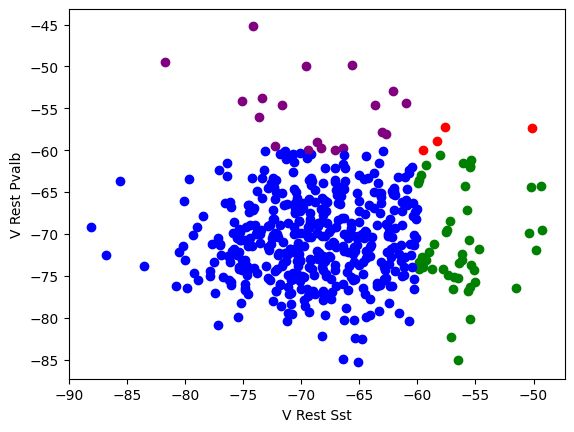

In [40]:
# Make scatter plot
plt.figure()

# Loop through each column and plot point
for i in range(len(v_rest_sst)):

  sst = v_rest_sst[i]
  pvalb = v_rest_pvalb[i]

  if sst > - 60 and pvalb > -60:
    plt.scatter(sst, pvalb, color = 'red')
  elif sst > - 60 and pvalb < - 60:
    plt.scatter(sst, pvalb, color = 'green')
  elif sst < - 60 and pvalb < - 60:
    plt.scatter(sst, pvalb, color = 'blue')
  elif sst < - 60 and pvalb > - 60:
    plt.scatter(sst, pvalb, color = 'purple')

# Label axis
plt.xlabel('V Rest Sst')
plt.ylabel('V Rest Pvalb')

# Show plot
plt.show()


In [41]:
# Create function for step 7
def vrestScatter():
  """
  This is a function that makes a scatter plot of V Rest Sst vs V Rest Pvalb, and color codes based on > or < -60.
  """
 # Make scatter plot
  plt.figure()

  # Loop through each column and plot point
  for i in range(len(v_rest_sst)):

    sst = v_rest_sst[i]
    pvalb = v_rest_pvalb[i]

    if sst > - 60 and pvalb > -60:
      plt.scatter(sst, pvalb, color = 'red')
    elif sst > - 60 and pvalb < - 60:
      plt.scatter(sst, pvalb, color = 'green')
    elif sst < - 60 and pvalb < - 60:
      plt.scatter(sst, pvalb, color = 'blue')
    elif sst < - 60 and pvalb > - 60:
      plt.scatter(sst, pvalb, color = 'purple')

  # Label axis
  plt.xlabel('V Rest Sst')
  plt.ylabel('V Rest Pvalb')

  # Show plot
  plt.show()
